# Creating the season history

* Wins, losses, and ties
* Season Fixtures
* Season summary
* Goals by player
* Goals Scored x Taken

First we gather the tools that will helps us with this task

In [132]:
from grfc.season_history import read_raw_data, goals_by_player, raw_goals_by_player, raw_scoreboard
from grfc import GRFC_FILE as GAMES_FILE

This is the data file the system will be reading from

In [133]:
GAMES_FILE

'GRFC 8H-1.xlsx'

Get the goals for each match and present a sample, from the first round

In [134]:
read_raw_data('GRFC 8H-1.xlsx')[0]

,Player 2,Player 3
15,Tigers,Bonnet Bay
16,Lachlan,1
17,Oliver,1
18,Nicholas,1
19,NaN,1
20,NaN,NaN
21,NaN,NaN
22,NaN,NaN
23,NaN,NaN
24,NaN,NaN


Create the specific game data, displaying another sample from the first round

In [135]:
raw_scoreboard(read_raw_data(GAMES_FILE))[0]

,Tigers,Bonnet Bay
0,Lachlan,1
1,Oliver,1
2,Nicholas,1
3,NaN,1
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


Now, couting the goals for each side. From the first round, we can check the final score

In [136]:
scoreboard(raw_scoreboard(read_raw_data(GAMES_FILE)))[0]

Tigers        3
Bonnet Bay    4
dtype: int64

Now, we calculate all the results so far in the season, showing if it is a win, loss, or tie, present the results in a table

In [163]:
RESULTS = results(match_results(scoreboard(raw_scoreboard(read_raw_data(GAMES_FILE)))))
RESULTS
DataFrame(RESULTS, index=range(1, 10))

,Result,Goals Scored,Goals Taken,Opponent
1,win,5.0,2.0,Gymea Bay
2,tie,4.0,4.0,Marton Hammers
3,win,7.0,1.0,Engadine Eagles
4,win,6.0,1.0,Menai Hawks
5,loss,1.0,5.0,Gymea United
6,loss,2.0,3.0,8H-2
7,win,3.0,2.0,Sylvania Heights
8,NaN,nan,nan,NaN
9,NaN,nan,nan,NaN


And a summary of the season

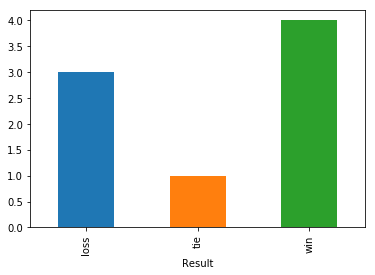

In [138]:
RESULTS.groupby(by='Result')['Result'].count().plot.bar()

From the raw scoreboard, we can then extract the number of goals scored by each player

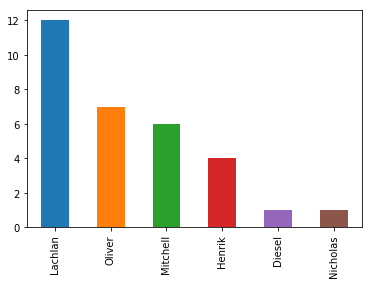

In [151]:
PLAYERS_GOALS = goals_by_player(raw_goals_by_player(raw_scoreboard(read_raw_data(GAMES_FILE))))
PLAYERS_GOALS.plot.bar()

Finally, the total goals scored and taken by the Tigers

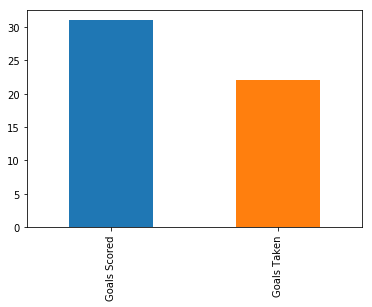

In [153]:
TOTAL_GOALS = RESULTS[['Goals Scored', 'Goals Taken']].sum()
TOTAL_GOALS.plot.bar()

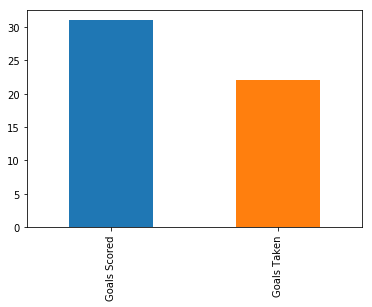

In [145]:
TOTAL_GOALS.plot.bar()